# Pymaceuticals Inc.
---

### Analysis

A positive correlation between mouse weight and tumor size is evident, indicating a strong linear relationship. As such, implementing a regimen that includes a healthy diet and exercise may be beneficial in reducing tumor size for the mice.

In the case of drug treatments, Capomulin emerges as notably effective in cancer treatment. For instance, in the case of mouse l509, tumor size consistently decreased over time under the Capomulin regimen.

Among the four drug regimens analyzed, Capomulin and Ramicane exhibit the most pronounced efficacy in reducing tumor size, while Infubinol and Ceftamin demonstrate comparatively lesser effectiveness. Consequently, it is advisable to either conduct further studies or advance Capomulin and Ramicane to the next stage of trials.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
total_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [13]:
# Checking the number of mice.
mice_data = total_data["Mouse ID"].unique()
number_of_mice = len(mice_data)
number_of_mice

249

In [14]:
# Our data should be uniquely identified by Mouse ID and Timepoint.
unique_mice_ids = merged_data['Mouse ID'].nunique()
print("Number of unique mice IDs:", unique_mice_ids)
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_dupes = total_data[total_data[["Mouse ID", "Timepoint"]].duplicated() == True]
mice_dupes_id = mice_dupes["Mouse ID"].unique()
mice_dupes_id

Number of unique mice IDs: 249


array(['g989'], dtype=object)

In [15]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_dupes_data = total_data.loc[total_data["Mouse ID"] == mice_dupes_id[0]]
mice_dupes_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_total_data=total_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_total_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [19]:
# Checking the number of mice in the clean DataFrame.
clean_mice_data = clean_total_data["Mouse ID"].unique()
clean_number_of_mice = len(clean_mice_data)
clean_number_of_mice

249

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
drug_reg_data = clean_total_data.set_index(["Drug Regimen"])
group_drug_data = drug_reg_data.groupby("Drug Regimen")
drug_reg_mean = group_drug_data["Tumor Volume (mm3)"].mean()
drug_reg_median = group_drug_data["Tumor Volume (mm3)"].median()
drug_reg_var = group_drug_data["Tumor Volume (mm3)"].var()
drug_reg_std = group_drug_data["Tumor Volume (mm3)"].std()
drug_reg_sem = group_drug_data["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
drug_reg_sum_df  = pd.DataFrame({"Mean Tumor Volume":  drug_reg_mean,
                                 "Median Tumor Volume":  drug_reg_median,
                                 "Tumor Volume Variance":  drug_reg_var,
                                 "Tumor Volume Std. Dev.":  drug_reg_std,
                                 "Tumor Volume Std. Err.":  drug_reg_sem})
drug_reg_sum_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_drug_reg_sum_df = drug_reg_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
agg_drug_reg_sum_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

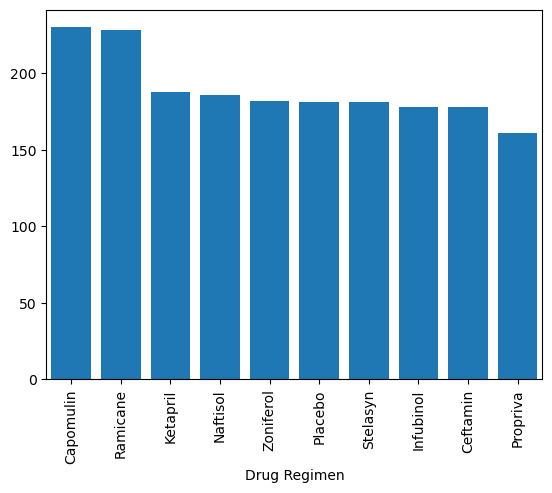

In [36]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

merged_data['Drug Regimen'].value_counts().plot(kind='bar')

# Using Matplotlib
import matplotlib.pyplot as plt
counts = merged_data['Drug Regimen'].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

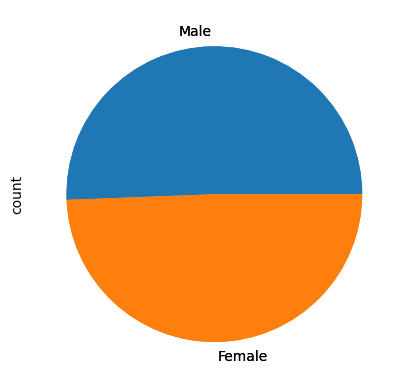

In [38]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Using Pandas
merged_data['Sex'].value_counts().plot(kind='pie')

# Using Matplotlib
counts = merged_data['Sex'].value_counts()
plt.pie(counts.values, labels=counts.index)
plt.show()

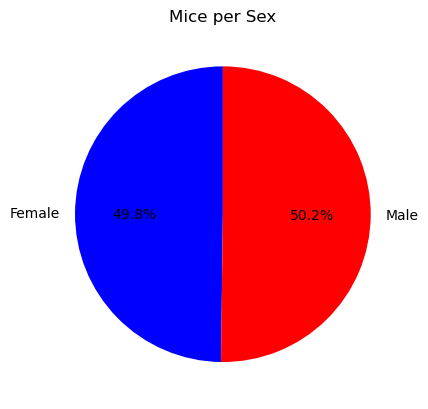

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = merged_data.groupby("Sex")[["Mouse ID"]].nunique()
mice_sex_chart = mice_sex["Mouse ID"].plot(
    kind="pie",label="", title="Mice per Sex", labels=mice_sex.index, autopct='%1.1f%%',legend=False,startangle=90,colors=["blue","red"])


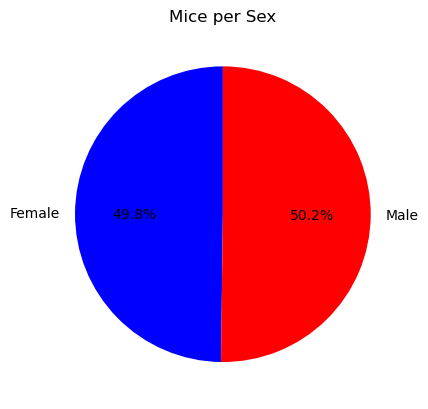

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig1, ax1 = plt.subplots()
ax1.pie(mice_sex["Mouse ID"], labels=mice_sex.index, autopct='%1.1f%%',startangle=90,colors=["blue","red"])
plt.title("Mice per Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [64]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
cap_df = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin",:]
ram_df = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane", :]
inf_df = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol", :]
ceft_df = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin", :]
cap_df.head()

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = merged_data.groupby('Mouse ID')['Timepoint'].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(merged_data, last_timepoints, on=['Mouse ID', 'Timepoint'])
# Extract the Mouse ID and Tumor Volume columns for the final tumor volume calculation
final_tumor_volume = final_tumor_volume_df[['Mouse ID', 'Tumor Volume (mm3)']]

# Display the final tumor volume for each mouse in the specified treatment regimens
print(final_tumor_volume)

    Mouse ID  Tumor Volume (mm3)
0       k403           22.050126
1       s185           23.343598
2       x401           28.484033
3       m601           28.430964
4       g791           29.128472
..       ...                 ...
244     z314           45.934712
245     z435           48.710661
246     z581           62.754451
247     z795           65.741070
248     z969           73.867845

[249 rows x 2 columns]


In [63]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_cap = []
tumor_ram = []
tumor_inf = []
tumor_cef = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in final_tumor_volume_df.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        tumor_cap.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        tumor_ram.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        tumor_inf.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        tumor_cef.append(row['Tumor Volume (mm3)'])
    
    # add subset
#created a data frame with the tumor data of the drugs listed.
drug_df = pd.DataFrame({"Capomulin": tumor_cap,
                       treatments[1]: tumor_ram,
                       treatments[2]: tumor_inf,
                       treatments[3]: tumor_cef
                       })
    
    
    # Determine outliers using upper and lower bounds
drug_df_max = drug_df.max()
drug_df_min = drug_df.min()
# drug_df2 = pd.merge(drug_df_min, drug_df_max)
drug_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,23.343598,22.050126,67.973419,62.999356
1,28.484033,29.128472,65.525743,45.000000
2,28.430964,30.276232,57.031862,56.057749
3,30.485985,30.564625,66.083066,55.742829
4,31.023923,30.638696,72.226731,48.722078
5,31.896238,31.560470,36.321346,47.784682
6,32.377357,31.095335,60.969711,61.849023
7,33.329098,33.397653,62.435404,68.923185
8,34.455298,32.978522,60.918767,67.748662
9,37.311846,33.562402,67.289621,57.918381


Capomulin's potential outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


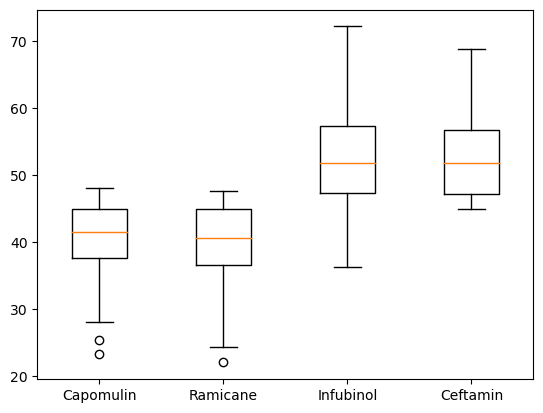

In [69]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_list = []

for drug in treatment_list:
    final_tumor_vol = merged_data.loc[merged_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumor_vol_list.append(final_tumor_vol)
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

plt.boxplot(tumor_vol_list, labels=treatment_list)
plt.show()

## Line and Scatter Plots

In [71]:
forline_df = cap_df.loc[cap_df["Mouse ID"] == "l509",:]
forline_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2


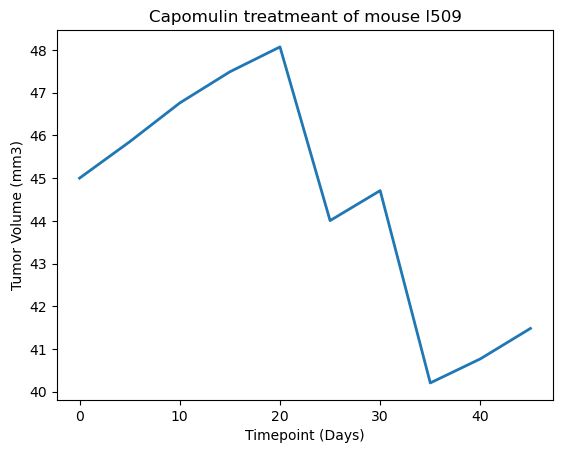

In [73]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
x_axisTP = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axisTP, tumsiz,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

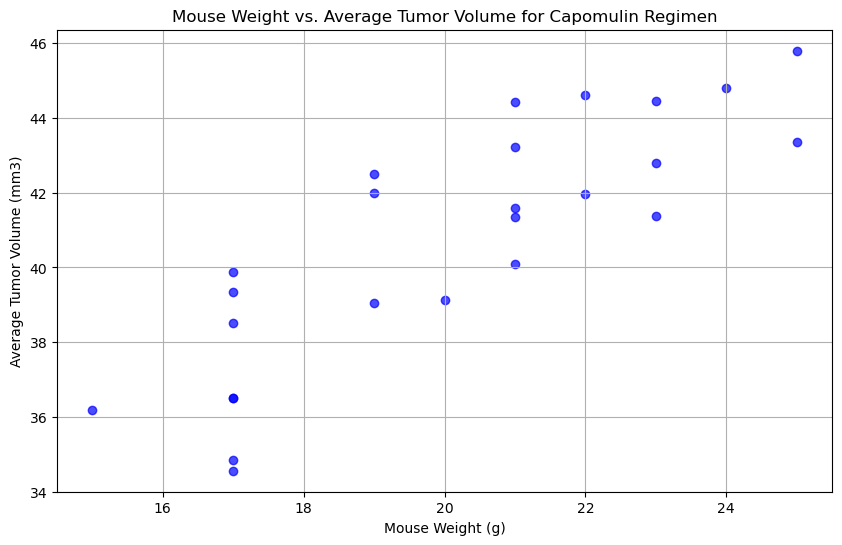

In [79]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for the Capomulin regimen
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding mouse weight for each mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Generate a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume, color='blue', alpha=0.7)

# Customize the plot
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)

# Show plot
plt.show()

## Correlation and Regression

Correlation coefficient between mouse weight and average tumor volume: 0.841936342469472


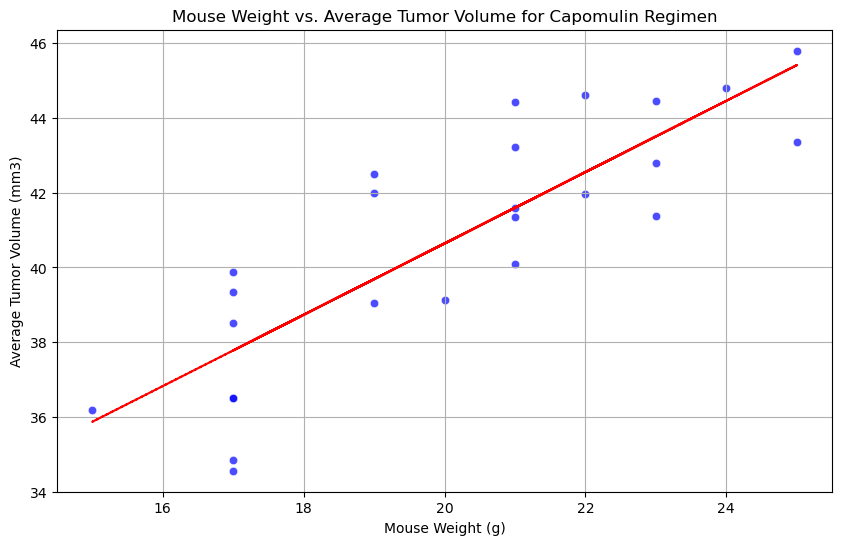

In [81]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
# Filter the data for the Capomulin regimen
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding mouse weight for each mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Calculate the correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(mouse_weight, average_tumor_volume)
print("Correlation coefficient between mouse weight and average tumor volume:", correlation_coefficient)

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mouse_weight, y=average_tumor_volume, color='blue', alpha=0.7)

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(mouse_weight, average_tumor_volume)

# Plot the regression line
plt.plot(mouse_weight, intercept + slope * mouse_weight, color='red', linestyle='--')

# Customize the plot
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)

# Show plot
plt.show()